## MAE290B, Final Project
## Cesar B. Rocha (<crocha@ucsd.edu>)
### Winter 2015

In [130]:
from __future__ import division
import numpy as np
from numpy import sqrt,pi,cos,sin,exp,sinh
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=3., rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid",{'grid_color':.95})

###Computing the source term
\begin{equation}
q(y) = q_0 \text{e}^{-a(j\,\Delta y - l_y/2)^2}\,,\tag{1}
\end{equation}
<p></p>
where $j=1,2,\ldots,N-1$

In [170]:
def source(q0=.1,a=10,ly=2.,N=10): 
    """ computes the source term as a function of y 
        
        Paramaters
        -------------------------------------------
        q0 :: the strengths of the source
        a  :: decay scale
        ly :: length of box in y direction
        N  :: number of points for discretization
        
    """
    dy = 2/N
    return q0*exp(-a*(np.arange(1,N)*dy-ly/2.)**2)

###The initial condition is trivial
\begin{equation}
f(y,t=0) = 0,\,\, y\neq 0\,.\tag{2}
\end{equation}

In [171]:
def initial(N): 
    """ returns trivial initial conditions
    """
    return np.zeros(N-1)

### Now we compute the function that defines the right-hand-sind of the system of ODEs

In [179]:
def rhs_diff_source(f,q,dy,f0=4,fly=0.,lx=2,ly=2,N=10,k=1.,alpha=2.):
    
    """ computes the rhs of the system of ODEs  
        
        Paramaters
        -------------------------------------------
        f0  :: boundary condition at y = 0
        fly :: boundary condition at y = ly
        dy  :: grid resolution
        lx  :: length of box in x direction
        ly  :: length of box in y direction
        N   :: number of points for discretization
        
        Inputs
        -------------------------------------------
        f :: a N by 1 array with the function f 
                at nodes j=1,2,...,N
        q :: N by 1 array with the source term        
        
    """
    
    assert f.size == N-1, "function f must have size N-1"
    assert q.size == N-1, "the source array must have size N-1"
    
    # compute constants
    beta = alpha/dy**2
    gamma = alpha*4*(pi**2)*(k**2)/lx**2
    
    # append boundary conditions
    fn = f.copy()
    fn = np.append(f0,fn)
    fn = np.append(fn,fly)
        
    return beta*(fn[2:]+fn[0:-2]) - (2*beta+gamma)*fn[1:-1] + q

### We then adapt a previous code to  step this system of ODEs forward using RK3

In [180]:
def my_ode(F,f0,q,t0,tf,dt,dy,N=10):
    
    '''
        Solve the system of ODEs that results from discretizing the
            two-dimensional diffusion equation with source q
            in a periodic domain in x.
            
        Parameters
        ---------------------------------------------------------
            t0: inital time
            tf: final time
            dt: time step
            N:  number of poins 
            
        Inputs    
        ----------------------------------------------------------
        F  :: function that represents the RHS of the system
        f0 :: N by 1 array of initial condition
    '''

    t = np.arange(t0,tf+dt,dt)
    
    fs = np.zeros((N-1,t.size))
    fs[:,0] = f0
    
    for i in range(1,t.size):
        fs[:,i] = stepforward(F,fs[:,i-1],q=q,dt=dt,dy=dy,N=N)

    return fs,t

def stepforward(F,f,q,dt,dy,N=10):
    
    '''
            Steps forward of ODEs that results from discretizing the
            two-dimensional diffusion equation with source q
            in a periodic domain in x.
            
            Uses RK3 schemme    
          
    '''
    
    a1 = 8/15.
    a2 = 2/3.

    F1 = F(f,q,dy)
    f1 = f + dt*a1*F1

    F2 = F(f1,q,dy)
    f2 = f1 + dt*a2*F2

    F3 = F(f2,q,dy)
    fnew = f + dt/4.*(F1+3.*F3)

    return fnew

In [181]:
k = 1
lx,ly = 2,2
alpha = 10.

beta = alpha/dy**2
gamma = alpha*4*(pi**2)*(k**2)/lx**2
    
N = 10
lx,ly = 2.,2.
dy = 2/N
y = np.arange(dy,ly+dy,dy)

# calculate dt that guarantees stability
dt = 2.5127/( beta + gamma) 

In [182]:
q = source(q0=.1,a=10,ly=2.,N=10)
f0 = initial(N)

### Now integrate the equation

In [183]:
f,t = my_ode(rhs_diff_source,f0,q,0,100,dt,dy,N=10)

In [184]:
A = 4/sinh(2*pi*k)
yi = np.arange(0,ly+dy,dy)
fexact = A*sinh(2*pi*k*(ly-yi)/lx)

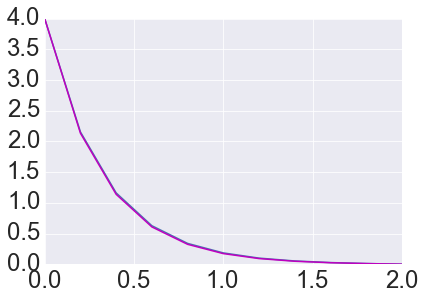

In [187]:
# append boundary conditions
ff = np.append(4.,f[:,-1])
ff = np.append(ff,0)
ff.size
#yi.size
plt.plot(yi,ff)
plt.plot(yi,fexact,'m')

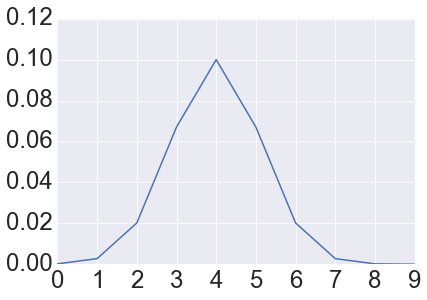